In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

np.random.seed(14159)

In [2]:
# Set parameters
p, n, m = 150, 300, 60

In [3]:
# Define variables
setting = "$p = {{{}}} \\quad n = {{{}}} \\quad m = {{{}}}$".format(p, n, m)
y = np.random.choice([-1, 1], size=n)

In [4]:
# Clustering
mu_norm_exp = np.linspace(0, 5, 20)
h_norm_exp = np.array([0.5, 1.5])
acc_unfolding = np.zeros((len(mu_norm_exp), len(h_norm_exp)))
acc_tensor = np.zeros_like(acc_unfolding)

for i, mu_norm in enumerate(tqdm(mu_norm_exp)):
    for j, h_norm in enumerate(h_norm_exp):
        X = utils.model(p, n, m, mu_norm, h_norm, y) # generate X
        yu = utils.unfolding_clustering(X) # clustering with unfolding
        yt = utils.tensor_clustering(X) # clustering with rank 1 approximation
        acc_unfolding[i, j] = np.mean(np.sign(yu) == y)
        acc_tensor[i, j] = np.mean(np.sign(yt) == y)
acc_unfolding = np.maximum(acc_unfolding, 1-acc_unfolding)
acc_tensor = np.maximum(acc_tensor, 1-acc_tensor)

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:27<00:00,  1.36s/it]


In [5]:
# Predicted accuracies
mu_norm_th = np.linspace(mu_norm_exp[0], mu_norm_exp[-1], 200)
acc_t = utils.tensor_accuracy(p, n, m, mu_norm_th, h_norm_exp)
acc_u = utils.unfolding_accuracy(p, n, m, mu_norm_th, h_norm_exp)
acc_wm = utils.weighted_mean_accuracy(p, n, m, mu_norm_th, h_norm_exp)

100%|██████████| 200/200 [00:05<00:00, 39.96it/s] 
c:\Users\hug97\Nextcloud\Doctorat\Projet\nested_matrix-tensor\utils.py:118: RuntimeWarning: divide by zero encountered in true_divide
  zeta = 1-(1/r)*(cn/(1-cm))*(r+cp/(1-cm))/(r+cn/(1-cm))


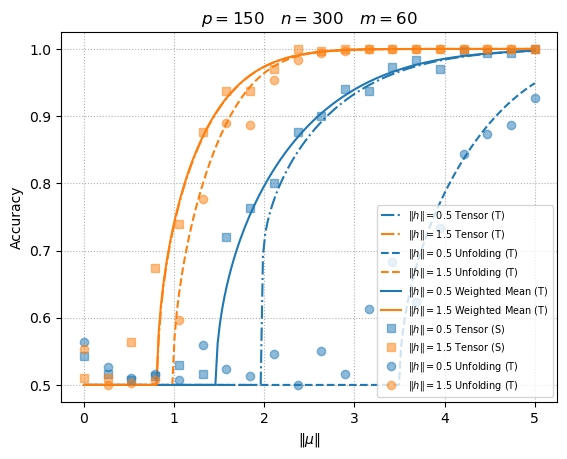

In [6]:
plt.plot(mu_norm_th, acc_t, ls='-.', label=["$\\Vert h \\Vert = {{{}}}$ Tensor (T)".format(h_norm) for h_norm in h_norm_exp])
plt.gca().set_prop_cycle(None)
plt.plot(mu_norm_th, acc_u, ls='--', label=["$\\Vert h \\Vert = {{{}}}$ Unfolding (T)".format(h_norm) for h_norm in h_norm_exp])
plt.gca().set_prop_cycle(None)
plt.plot(mu_norm_th, acc_wm, ls='-', label=["$\\Vert h \\Vert = {{{}}}$ Weighted Mean (T)".format(h_norm) for h_norm in h_norm_exp])
plt.gca().set_prop_cycle(None)
plt.plot(mu_norm_exp, acc_tensor, ls='', marker='s', alpha=.5, label=["$\\Vert h \\Vert = {{{}}}$ Tensor (S)".format(h_norm) for h_norm in h_norm_exp])
plt.gca().set_prop_cycle(None)
plt.plot(mu_norm_exp, acc_unfolding, ls='', marker='o', alpha=.5, label=["$\\Vert h \\Vert = {{{}}}$ Unfolding (T)".format(h_norm) for h_norm in h_norm_exp])
plt.grid(ls=':')
plt.xlabel("$\\Vert \\mu \\Vert$")
plt.ylabel("Accuracy")
plt.title(setting)
plt.legend(fontsize=7)
plt.show()